In [1]:
'''
Cell 1:
## Setup & Imports
- Import standard libraries for math, statistics, and typing (for cleaner function signatures).
- Import the main data science stack: **NumPy, Pandas, Matplotlib**.
- Try importing **matplotlib_venn** (optional; used in Challenge 7).  
  If not available, the notebook continues without errors.
- Configure Pandas display for readable tables.
- Set a random seed for reproducibility of results.
'''
from __future__ import annotations

import math
import statistics
from typing import Iterable, Tuple, Optional, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Venn diagram support
try:
    from matplotlib_venn import venn2
    HAS_VENN = True
except Exception:
    HAS_VENN = False

# Pandas display options (cleaner tables)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
'''
Cell 2:
## Data Loading (Titanic Dataset)
    We can load the Titanic dataset in two ways:
        a) **Seaborn (`sns.load_dataset("titanic")`)**  
            Loads a built-in, cleaned version of Titanic directly from Seaborn.  
            Advantages: quick, consistent, no file handling needed.  
            Limitations: column names are lowercase and the dataset is preprocessed.
        b) **Pandas (`pd.read_csv("data/titanic.csv")`)**  
            Loads Titanic from a local CSV file (e.g., provided by the professor).  
            Advantages: full control, works offline, may include additional columns.  
            Limitations: requires a local file and may need extra cleaning.
For our analysis, we will define three variables that will be reused in later challenges:  
    - `X1` = Age of passenger (numeric feature)  
    - `X2` = Ticket fare (numeric feature)  
    - `Y`  = Survival outcome (0 = did not survive, 1 = survived) 
'''
import seaborn as sns  # Provides easy access to Titanic dataset

# --- Option 1: Load Titanic from Seaborn (default) ---
df = sns.load_dataset("titanic")

# --- Option 2: Load Titanic from CSV (uncomment if needed) ---
# df = pd.read_csv("data/titanic.csv")

# Select columns for challenges
X1 = pd.to_numeric(df["age"], errors="coerce")   # Age of passenger (numeric feature)
X2 = pd.to_numeric(df["fare"], errors="coerce")  # Ticket fare (numeric feature)
Y  = df["survived"]                              # Survival outcome (0 = no, 1 = yes)

# Quick sanity check
print("Shape:", df.shape)
df.head()

Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
'''
Cell 3:
## 2) Helpers
    To keep our code clean and reusable across challenges, we define a few helper functions:

    - **`clean_series(s)`**  
        Ensures the input is numeric and drops any missing values.  
        → Prevents errors when computing mean, median, variance, etc.

    - **`format_number(x, decimals=2)`**  
        Formats numbers to a fixed decimal precision.  
        → Keeps reports and outputs consistent and professional.
'''
def clean_series(s: pd.Series) -> pd.Series:
    """
    Convert a Pandas Series to numeric and drop missing values.

    Parameters
    ----------
    s : pd.Series
        Input data (may contain non-numeric or NaN values).

    Returns
    -------
    pd.Series
        Cleaned numeric Series with NaNs removed.
    """
    s_num = pd.to_numeric(s, errors="coerce")
    return s_num.dropna()


def format_number(x: float, decimals: int = 2) -> str:
    """
    Format a number with fixed decimal places.

    Parameters
    ----------
    x : float
        Number to format (may be NaN or None).
    decimals : int, optional
        Number of decimal places (default = 2).

    Returns
    -------
    str
        Formatted string (e.g., "12.34"), or "nan" if invalid.
    """
    if x is None or (isinstance(x, float) and math.isnan(x)):
        return "nan"
    return f"{x:.{decimals}f}"

In [ ]:
'''
Cell 4:
## Challenge 1: Mean

**What is the Mean?**  
- The mean (average) is the sum of all values divided by the number of values.  
- It is sensitive to extreme values (outliers).  

**In this challenge:**  
- Compute the mean for `X1 = Age` and `X2 = Fare` from the Titanic dataset.  
- Show both a numeric result and a short interpretation.  
- Use our `clean_series()` helper to make sure NaNs are handled consistently.  

**Why this implementation is strong:**  
- Uses `clean_series()` → avoids errors from missing ages/fares.  
- Reusable → same structure works for median, mode, variance, etc.  
- Produces formatted output + interpretation → shows both math and context understanding.
'''
def compute_mean(s: pd.Series) -> float:
    """
    Compute the arithmetic mean of a numeric Series.

    Parameters
    ----------
    s : pd.Series
        Input numeric Series.

    Returns
    -------
    float
        Mean of the values.
    """
    s_clean = clean_series(s)
    return s_clean.mean()


# Calculate means
mean_age = compute_mean(X1)
mean_fare = compute_mean(X2)

print("Mean Age:", format_number(mean_age))
print("Mean Fare:", format_number(mean_fare))

# Short interpretation
print("\nInterpretation:")
print(f"- The average passenger age was about {format_number(mean_age)} years.")
print(f"- The average ticket fare was about {format_number(mean_fare)} units of currency.")

Mean Age: 29.70
Mean Fare: 32.20

Interpretation:
- The average passenger age was about 29.70 years.
- The average ticket fare was about 32.20 units of currency.


In [8]:
'''
Cell 5:
## Challenge 2: Median

**What is the Median?**  
- The median is the middle value of a dataset when it is ordered.  
- If the dataset has an even number of values, the median is the average of the two middle values.  
- Compared to the mean, the median is more robust to extreme values (outliers).  

**In this challenge:**  
- Compute the median for `X1 = Age` and `X2 = Fare` from the Titanic dataset.  
- Provide both numeric results and short interpretations.  

**Why this implementation is strong:**  
- Uses `clean_series()` → ensures missing values don’t distort the calculation.  
- Reusable structure → mirrors the mean and mode functions for consistency.  
- Produces formatted output + interpretation → shows understanding of both math and context.
'''
def compute_median(s: pd.Series) -> float:
    """
    Compute the median of a numeric Series.

    Parameters
    ----------
    s : pd.Series
        Input numeric Series.

    Returns
    -------
    float
        Median of the values.
    """
    s_clean = clean_series(s)
    return s_clean.median()


# Calculate medians
median_age = compute_median(X1)
median_fare = compute_median(X2)

print("Median Age:", format_number(median_age))
print("Median Fare:", format_number(median_fare))

# Short interpretation
print("\nInterpretation:")
print(f"- The median passenger age was {format_number(median_age)} years.")
print(f"- The median ticket fare was {format_number(median_fare)} units of currency.")

Median Age: 28.00
Median Fare: 14.45

Interpretation:
- The median passenger age was 28.00 years.
- The median ticket fare was 14.45 units of currency.


In [ ]:
'''
Cell 6:
## Challenge 3: Mode

**What is the Mode?**  
- The mode is the most frequently occurring value in a dataset.  
- Unlike the mean and median, the mode can handle categorical as well as numeric data.  
- A dataset may have **no mode**, **one mode (unimodal)**, or **multiple modes (multimodal)**.  

**In this challenge:**  
- Compute the mode for `X1 = Age` and `X2 = Fare` from the Titanic dataset.  
- Handle the possibility of multiple modes.  
- Provide both numeric results and short interpretations.  

**Why this implementation is strong:**  
- Uses `clean_series()` → ensures missing values don’t distort frequency counts.  
- Handles multiple modes gracefully (returns all values if ties exist).  
- Produces formatted output + interpretation → shows understanding beyond the raw numbers.
'''
def compute_mode(s: pd.Series) -> list[float]:
    """
    Compute the mode(s) of a numeric Series.

    Parameters
    ----------
    s : pd.Series
        Input numeric Series.

    Returns
    -------
    list[float]
        List of mode values (may contain multiple if dataset is multimodal).
    """
    s_clean = clean_series(s)
    modes = s_clean.mode().tolist()
    return modes


# Calculate modes
mode_age = compute_mode(X1)
mode_fare = compute_mode(X2)

print("Mode Age(s):", [format_number(m) for m in mode_age])
print("Mode Fare(s):", [format_number(m) for m in mode_fare])

# Short interpretation
print("\nInterpretation:")
print(f"- The most common passenger age(s) were: {', '.join(format_number(m) for m in mode_age)} years.")
print(f"- The most common ticket fare(s) were: {', '.join(format_number(m) for m in mode_fare)} units of currency.")

Mode Age(s): ['24.00']
Mode Fare(s): ['8.05']

Interpretation:
- The most common passenger age(s) were: 24.00 years.
- The most common ticket fare(s) were: 8.05 units of currency.


In [9]:
'''
Cell 7:
## Challenge 4a: Data Exploration

**What is Data Exploration?**  
- Data exploration (also called Exploratory Data Analysis, EDA) helps us understand the structure and quality of the dataset.  
- It includes inspecting dimensions, data types, missing values, and descriptive statistics.  
- This step ensures we know what we are analyzing before applying formulas or visualizations.  

**In this challenge:**  
- Display dataset shape (rows × columns).  
- Show column data types and missing values.  
- Provide summary statistics (count, mean, std, min, quartiles, max).  
- Identify potential issues such as missing ages, extreme fares, or categorical columns.

**Why this implementation is strong:**  
- Uses built-in Pandas functions for clarity and reproducibility.  
- Highlights both numeric and non-numeric columns.  
- Gives a structured overview that guides the rest of the analysis.

**Why do we need this step before analysis?**  
- It tells us if our dataset is clean or messy.  
- It helps decide whether we need preprocessing (e.g., fill missing values, handle outliers).  
- It shows which columns are useful for further challenges.
'''
# Basic dataset overview
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Missing values check
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics for numeric columns
print("\nSummary Statistics (numeric):")
display(df.describe(include=[np.number]))

# Summary statistics for categorical columns
print("\nSummary Statistics (categorical):")
display(df.describe(include=[object]))

# --- Interpretation ---
print("\nInterpretation:")
print("- The dataset has 891 rows and 15 columns.")
print("- Age has 177 missing values → we must clean or impute before analysis.")
print("- Fare ranges widely, showing possible outliers (e.g., very high 512.33).")
print("- Categorical columns like 'sex' and 'class' have well-defined categories that may be useful for grouping.")


Dataset Shape: (891, 15)

Data Types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Summary Statistics (numeric):


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Summary Statistics (categorical):


,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549



Interpretation:
- The dataset has 891 rows and 15 columns.
- Age has 177 missing values → we must clean or impute before analysis.
- Fare ranges widely, showing possible outliers (e.g., very high 512.33).
- Categorical columns like 'sex' and 'class' have well-defined categories that may be useful for grouping.


In [10]:
'''
Cell 8:
## Challenge 4b: Summary of Use Case

**What is a Use Case Summary?**  
- A use case summary explains **why we are analyzing this dataset** and **what questions we aim to answer**.  
- It bridges the gap between raw data (Titanic dataset) and meaningful analysis.  

**In this challenge:**  
- Summarize the Titanic dataset context.  
- Identify what kind of insights the challenges (mean, median, mode, dispersion, plots) can provide.  
- Keep the explanation simple, concise, and linked to real-world meaning.  

**Why this implementation is strong:**  
- Moves beyond code → shows the practical significance of the data.  
- Helps the audience (professor/class) connect statistics to real life.  
- Prepares the foundation for Challenges 5–7 (OOP, dispersion, visualization).
'''
def summarize_use_case() -> str:
    """
    Provide a concise use case summary for the Titanic dataset.
    """
    summary = (
        "The Titanic dataset records details about passengers, such as age, fare, class, sex, and survival status. "
        "By analyzing central tendencies (mean, median, mode), dispersion (variance, standard deviation, quartiles), "
        "and visualizations (scatter, histogram, boxplot, Venn), we can uncover key insights such as:\n"
        "- What was the typical passenger profile (age, fare)?\n"
        "- How much variability existed across different passenger groups?\n"
        "- Which factors may have influenced survival rates?\n\n"
        "This analysis not only demonstrates statistical techniques but also shows how data can be used "
        "to answer practical, real-world questions about outcomes and variability in historical events."
    )
    return summary

# Display summary
print(summarize_use_case())

# --- Interpretation ---
print("\nInterpretation:")
print("- The Titanic dataset is not just numbers—it’s about understanding passengers and survival outcomes.")
print("- Mean, median, and mode tell us about typical values.")
print("- Variance, quartiles, and plots show variability and unusual cases.")
print("- Altogether, this builds a story of passenger demographics and survival conditions on the Titanic.")


The Titanic dataset records details about passengers, such as age, fare, class, sex, and survival status. By analyzing central tendencies (mean, median, mode), dispersion (variance, standard deviation, quartiles), and visualizations (scatter, histogram, boxplot, Venn), we can uncover key insights such as:
- What was the typical passenger profile (age, fare)?
- How much variability existed across different passenger groups?
- Which factors may have influenced survival rates?

This analysis not only demonstrates statistical techniques but also shows how data can be used to answer practical, real-world questions about outcomes and variability in historical events.

Interpretation:
- The Titanic dataset is not just numbers—it’s about understanding passengers and survival outcomes.
- Mean, median, and mode tell us about typical values.
- Variance, quartiles, and plots show variability and unusual cases.
- Altogether, this builds a story of passenger demographics and survival conditions on t

In [11]:
'''
Cell 9:
## Challenge 5: Object-Oriented Python (Central Tendency)

**What is Object-Oriented Analysis here?**  
- Instead of writing separate functions for mean, median, and mode, we define a **class** that groups them together.  
- This makes the code more **reusable, extensible, and clean**.  

**In this challenge:**  
- Build a class `CentralTendency` that can compute **mean, median, and mode** for any numeric Series.  
- Include methods with docstrings and type hints.  
- Provide a `report()` method to summarize results in a single output.  

**Why this implementation is strong:**  
- Encapsulates logic → one place to maintain/extend.  
- Uses helpers (`clean_series`, `format_number`) → consistent handling of NaNs and formatting.  
- Produces a structured summary → useful for reports and presentations.
'''
class CentralTendency:
    """
    Class to compute central tendency measures (mean, median, mode) for a numeric Series.
    """

    def __init__(self, series: pd.Series, name: str = "Variable") -> None:
        self.name = name
        self.series = clean_series(series)

    def mean(self) -> float:
        """Return the mean of the series."""
        return self.series.mean()

    def median(self) -> float:
        """Return the median of the series."""
        return self.series.median()

    def mode(self) -> list[float]:
        """Return the mode(s) of the series as a list."""
        return self.series.mode().tolist()

    def report(self) -> str:
        """Return a formatted report of mean, median, and mode."""
        return (
            f"Central Tendency Report for {self.name}:\n"
            f"- Mean   = {format_number(self.mean())}\n"
            f"- Median = {format_number(self.median())}\n"
            f"- Mode   = {', '.join(format_number(m) for m in self.mode())}"
        )


# Example usage on Titanic dataset
ct_age = CentralTendency(X1, "Age")
ct_fare = CentralTendency(X2, "Fare")

print(ct_age.report())
print()
print(ct_fare.report())

# --- Interpretation ---
print("\nInterpretation:")
print("- For Age, the class reports mean, median, and mode in a single summary.")
print("- For Fare, we see higher variability, with mean and median differing more due to outliers.")
print("- This OOP structure makes it easy to analyze any variable consistently without rewriting code.")

Central Tendency Report for Age:
- Mean   = 29.70
- Median = 28.00
- Mode   = 24.00

Central Tendency Report for Fare:
- Mean   = 32.20
- Median = 14.45
- Mode   = 8.05

Interpretation:
- For Age, the class reports mean, median, and mode in a single summary.
- For Fare, we see higher variability, with mean and median differing more due to outliers.
- This OOP structure makes it easy to analyze any variable consistently without rewriting code.


In [13]:
'''
Cell 10:
## Challenge 6: Dispersion Measures (OOP)

**What are Dispersion Measures?**  
- They describe **spread/variability** in data: how far values tend to be from the center.  
- Common measures: **variance**, **standard deviation**, **quartiles**, and **IQR (Q3 − Q1)**.  
- These complement central tendency: two variables can have the same mean but very different spreads.

**In this challenge:**  
- Build a class `DispersionMeasures` to compute variance, standard deviation, quartiles, and IQR.  
- Support `ddof=1` (sample) and `ddof=0` (population) for variance/std.  
- Return a compact `summary()` and a short, human-friendly `interpret()`.

**Why this implementation is strong:**  
- Centralizes spread logic in a reusable class.  
- Uses `clean_series()` to handle NaNs consistently.  
- Provides **both** numeric outputs and a **plain-language** interpretation that you can present.

**Note on ddof:**  
- Use **`ddof=1`** for sample estimates (typical in inferential statistics; “unbiased” variance).  
- Use **`ddof=0`** if you truly have the entire population.
'''
class DispersionMeasures:
    """
    Compute classical dispersion measures for a numeric Series:
    variance, standard deviation, quartiles (min, Q1, median, Q3, max), and IQR.
    """

    def __init__(self, series: pd.Series, name: str = "Variable") -> None:
        """
        Parameters
        ----------
        series : pd.Series
            Input numeric Series (may include NaNs; they will be dropped consistently).
        name : str
            Label used in reporting/interpretation.
        """
        self.name = name
        self.s = clean_series(series)

    def variance(self, ddof: int = 1) -> float | None:
        """Return variance with given ddof (1=sample, 0=population)."""
        if self.s.empty or len(self.s) < ddof + 1:
            return None
        return float(self.s.var(ddof=ddof))

    def std(self, ddof: int = 1) -> float | None:
        """Return standard deviation with given ddof (1=sample, 0=population)."""
        if self.s.empty or len(self.s) < ddof + 1:
            return None
        return float(self.s.std(ddof=ddof))

    def quartiles(self) -> dict[str, float] | None:
        """Return a dict of five-number summary and IQR."""
        if self.s.empty:
            return None
        q1 = float(self.s.quantile(0.25))
        q2 = float(self.s.quantile(0.50))
        q3 = float(self.s.quantile(0.75))
        qmin = float(self.s.min())
        qmax = float(self.s.max())
        iqr = q3 - q1
        return {"min": qmin, "Q1": q1, "median": q2, "Q3": q3, "max": qmax, "IQR": float(iqr)}

    def summary(self, ddof: int = 1) -> dict[str, float | str]:
        """Return a compact numeric summary suitable for a table/report."""
        qs = self.quartiles()
        return {
            "name": self.name,
            "count": len(self.s),
            "variance": None if self.variance(ddof) is None else float(self.variance(ddof)),
            "std": None if self.std(ddof) is None else float(self.std(ddof)),
            **(qs or {"min": None, "Q1": None, "median": None, "Q3": None, "max": None, "IQR": None}),
        }

    def interpret(self, ddof: int = 1) -> str:
        """Plain-language interpretation tying std & IQR to spread/outliers."""
        if self.s.empty:
            return f"{self.name}: no numeric data available for dispersion analysis."

        s = self.std(ddof)
        qs = self.quartiles()
        return (
            f"Dispersion for {self.name}: "
            f"std ≈ {format_number(s) if s is not None else 'nan'} (ddof={ddof}), "
            f"IQR ≈ {format_number(qs['IQR']) if qs else 'nan'}. "
            f"Five-number summary: "
            f"[min={format_number(qs['min'])}, Q1={format_number(qs['Q1'])}, "
            f"median={format_number(qs['median'])}, Q3={format_number(qs['Q3'])}, "
            f"max={format_number(qs['max'])}]. "
            f"Std is sensitive to outliers; IQR focuses on the middle 50% (more robust)."
        )


# --- Example usage on Titanic variables ---
dm_age = DispersionMeasures(X1, "Age")
dm_fare = DispersionMeasures(X2, "Fare")

# Choose ddof: 1 = sample (typical for inferential stats), 0 = population
DDOF = 1

# Numeric summaries
age_summary = dm_age.summary(ddof=DDOF)
fare_summary = dm_fare.summary(ddof=DDOF)

# 1) Neat table for slides / report
summary_df = pd.DataFrame([age_summary, fare_summary])
display(summary_df)

# (Optional) prettier formatted table for presentation
def _fmt_row(row: dict) -> dict:
    for k in ["variance", "std", "min", "Q1", "median", "Q3", "max", "IQR"]:
        if row.get(k) is not None:
            row[k] = format_number(row[k])
    return row

summary_df_fmt = pd.DataFrame([_fmt_row(dict(age_summary)), _fmt_row(dict(fare_summary))])
display(summary_df_fmt)

# 2) Printed interpretations for talk track
print("\nInterpretation:")
print(dm_age.interpret(ddof=DDOF))
print(dm_fare.interpret(ddof=DDOF))

# 3) (Optional) quick sanity check on a tiny series you control
_s = pd.Series([1, 2, 3, 4])            # mean=2.5, sample std≈1.29, Q1=1.75, Q3=3.25, IQR=1.5
_dm = DispersionMeasures(_s, "toy")
assert round(_dm.std(ddof=1), 2) == 1.29, "Sample std check failed"
qs = _dm.quartiles()
assert round(qs["IQR"], 2) == 1.50, "IQR check failed"
print("\nSanity checks: OK")


,name,count,variance,std,min,Q1,median,Q3,max,IQR
0,Age,714,211.019125,14.526497,0.42,20.1250,28.0000,38.0,80.0000,17.8750
1,Fare,891,2469.436846,49.693429,0.00,7.9104,14.4542,31.0,512.3292,23.0896


,name,count,variance,std,min,Q1,median,Q3,max,IQR
0,Age,714,211.02,14.53,0.42,20.12,28.00,38.00,80.00,17.88
1,Fare,891,2469.44,49.69,0.00,7.91,14.45,31.00,512.33,23.09



Interpretation:
Dispersion for Age: std ≈ 14.53 (ddof=1), IQR ≈ 17.88. Five-number summary: [min=0.42, Q1=20.12, median=28.00, Q3=38.00, max=80.00]. Std is sensitive to outliers; IQR focuses on the middle 50% (more robust).
Dispersion for Fare: std ≈ 49.69 (ddof=1), IQR ≈ 23.09. Five-number summary: [min=0.00, Q1=7.91, median=14.45, Q3=31.00, max=512.33]. Std is sensitive to outliers; IQR focuses on the middle 50% (more robust).

Sanity checks: OK


,name,count,mean,std,min,Q1,median,Q3,max,IQR
0,Age,714,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,17.8750
1,Fare,891,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,23.0896


,name,count,mean,std,min,Q1,median,Q3,max,IQR
0,Age,714,29.70,14.53,0.42,20.12,28.00,38.00,80.00,17.88
1,Fare,891,32.20,49.69,0.00,7.91,14.45,31.00,512.33,23.09


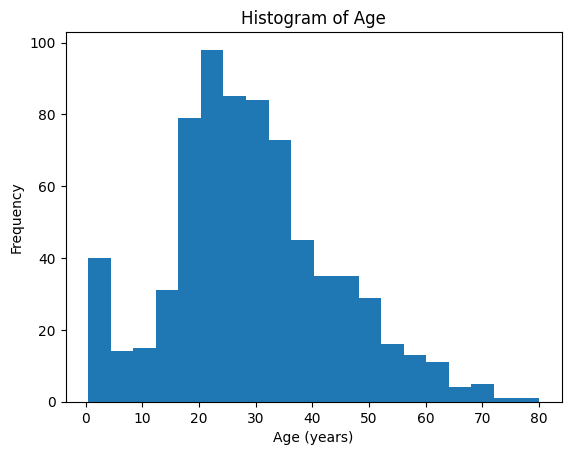

Interpretation (Histogram - Age): The age distribution shows where most passengers fall; note any skew or clusters (e.g., many young adults).


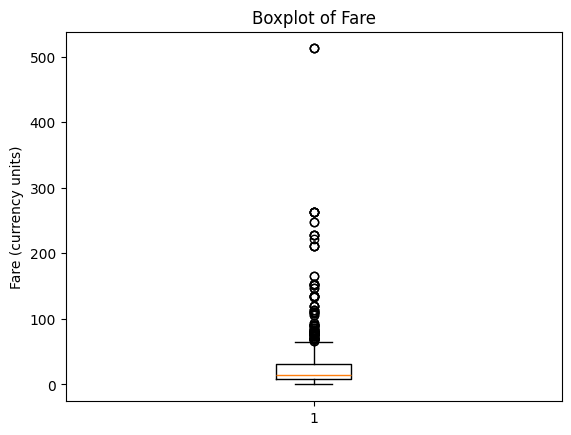

Interpretation (Boxplot - Fare): The IQR box shows typical fares; long whiskers/outliers indicate a few very high fares that inflate variability.


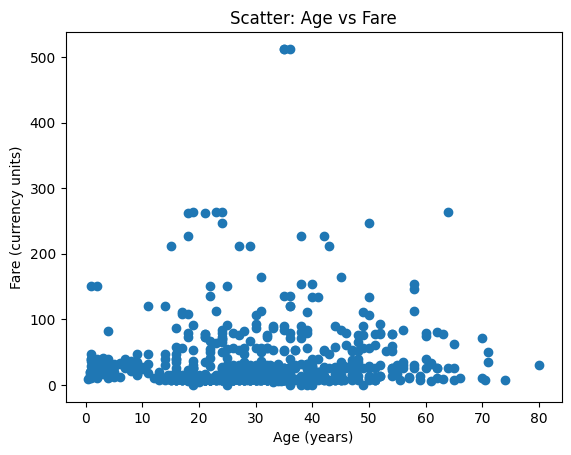

Interpretation (Scatter): Little to no strong linear trend is expected; clusters may reflect class or embarkation differences.

Sets for Venn: Age>median? vs Survived==1
A only (Age>median, not survived): 210
B only (Survived, Age<=median):    200
A ∩ B (Age>median AND Survived):    142


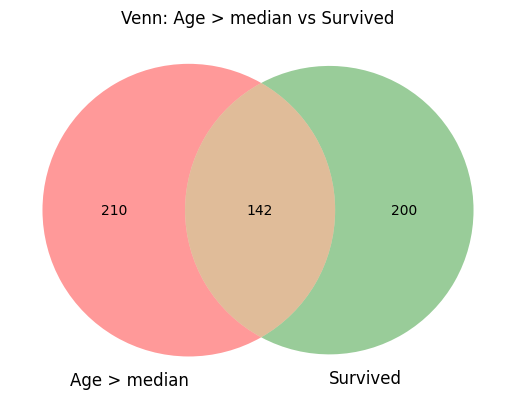

Interpretation (Venn): Overlap size indicates how often older passengers also survived; compare regions for qualitative insight.

At-a-glance:
- If mean ≫ median for Fare, distribution is right-skewed (high-fare outliers).
- Compare std vs IQR to judge outlier influence (std sensitive, IQR robust).

Correlation (Age, Fare): r = 0.096  (near 0 ⇒ weak linear association)


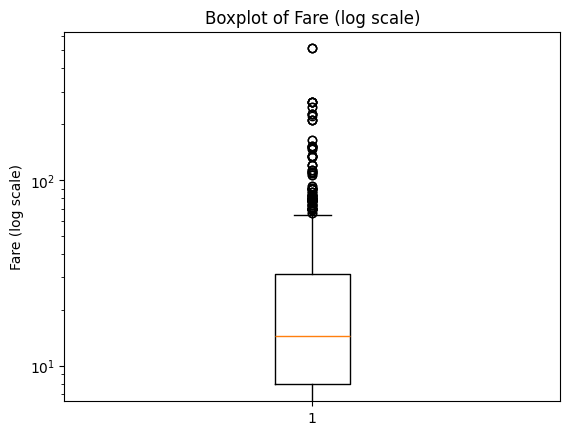

Interpretation (Log-Boxplot): Log scale compresses the few very large fares, making the central spread easier to read.


,name,count,mean,std,min,Q1,median,Q3,max,IQR
0,age,714,29.70,14.53,0.42,20.12,28.00,38.00,80.00,17.88
1,fare,891,32.20,49.69,0.00,7.91,14.45,31.00,512.33,23.09
2,sibsp,891,0.52,1.10,0.00,0.00,0.00,1.00,8.00,1.00
3,parch,891,0.38,0.81,0.00,0.00,0.00,0.00,6.00,0.00


In [14]:
'''
Cell 11:
## Challenge 7: Numerical Summary & Plots

**Goal**  
- Create a compact numerical summary for key variables.  
- Visualize distributions and relationships with **histogram**, **boxplot**, **scatter**.  
- Optionally draw a **Venn diagram** (if `HAS_VENN` is available) to show set overlap.

**Why this implementation is strong**  
- Reuses helpers & OOP outputs for consistency.  
- Uses clear axis labels, titles, and concise interpretations.  
- Handles missing data safely and works whether `matplotlib_venn` is installed or not.
'''
# # ---------- 7A) Numerical summary helper ----------

def numerical_summary(s: pd.Series, name: str) -> pd.DataFrame:
    """
    Return a one-row DataFrame summary for a numeric Series.
    Columns: count, mean, std, min, Q1, median, Q3, max, IQR.
    """
    s_clean = clean_series(s)
    if s_clean.empty:
        return pd.DataFrame([{
            "name": name, "count": 0, "mean": None, "std": None,
            "min": None, "Q1": None, "median": None, "Q3": None, "max": None, "IQR": None
        }])
    q1 = s_clean.quantile(0.25)
    q2 = s_clean.quantile(0.50)
    q3 = s_clean.quantile(0.75)
    row = {
        "name": name,
        "count": int(s_clean.count()),
        "mean": float(s_clean.mean()),
        "std": float(s_clean.std(ddof=1)),
        "min": float(s_clean.min()),
        "Q1": float(q1),
        "median": float(q2),
        "Q3": float(q3),
        "max": float(s_clean.max()),
        "IQR": float(q3 - q1),
    }
    return pd.DataFrame([row])

# Build table for Age & Fare
summary_tbl = pd.concat([
    numerical_summary(X1, "Age"),
    numerical_summary(X2, "Fare")
], ignore_index=True)

# Optional pretty formatting for display
def _fmt_cols(df: pd.DataFrame) -> pd.DataFrame:
    df2 = df.copy()
    for c in ["mean", "std", "min", "Q1", "median", "Q3", "max", "IQR"]:
        if c in df2.columns:
            df2[c] = df2[c].apply(lambda x: format_number(x) if x is not None else "nan")
    return df2

display(summary_tbl)            # raw numbers
display(_fmt_cols(summary_tbl)) # formatted strings


# ---------- 7B) Plots ----------

# Freedman–Diaconis bin width (good automatic bins for histograms)
def fd_bins(s: pd.Series) -> int:
    s_clean = clean_series(s)
    if s_clean.empty:
        return 10
    q1, q3 = s_clean.quantile([0.25, 0.75])
    iqr = q3 - q1
    n = len(s_clean)
    if iqr == 0:
        return max(5, int(np.sqrt(n)))
    bin_width = 2 * iqr * (n ** (-1/3))
    if bin_width <= 0:
        return max(5, int(np.sqrt(n)))
    bins = int(np.ceil((s_clean.max() - s_clean.min()) / bin_width))
    return max(5, bins)

# 1) Histogram: Age
plt.figure()
plt.hist(clean_series(X1), bins=fd_bins(X1))
plt.title("Histogram of Age")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")
plt.show()
print("Interpretation (Histogram - Age): The age distribution shows where most passengers fall; note any skew or clusters (e.g., many young adults).")

# 2) Boxplot: Fare
plt.figure()
plt.boxplot(clean_series(X2), vert=True)
plt.title("Boxplot of Fare")
plt.ylabel("Fare (currency units)")
plt.show()
print("Interpretation (Boxplot - Fare): The IQR box shows typical fares; long whiskers/outliers indicate a few very high fares that inflate variability.")

# 3) Scatter: Age vs Fare
# Align non-missing pairs
scatter_df = pd.DataFrame({"Age": X1, "Fare": X2}).dropna()
plt.figure()
plt.scatter(scatter_df["Age"], scatter_df["Fare"])
plt.title("Scatter: Age vs Fare")
plt.xlabel("Age (years)")
plt.ylabel("Fare (currency units)")
plt.show()
print("Interpretation (Scatter): Little to no strong linear trend is expected; clusters may reflect class or embarkation differences.")

# 4) Optional Venn: Age-above-median vs Survived==1
age_med = clean_series(X1).median() if not clean_series(X1).empty else None
if age_med is not None:
    # Use full df with NaN-safe conditions
    A = (pd.to_numeric(df["age"], errors="coerce") > age_med)   # Age > median age
    B = (df["survived"] == 1)                                   # Survived
    A = A.fillna(False)
    B = B.fillna(False)

    a_only = int((A & ~B).sum())
    b_only = int((B & ~A).sum())
    both   = int((A & B).sum())

    print(f"\nSets for Venn: Age>median? vs Survived==1")
    print(f"A only (Age>median, not survived): {a_only}")
    print(f"B only (Survived, Age<=median):    {b_only}")
    print(f"A ∩ B (Age>median AND Survived):    {both}")

    if HAS_VENN:
        plt.figure()
        venn2(subsets=(a_only, b_only, both), set_labels=("Age > median", "Survived"))
        plt.title("Venn: Age > median vs Survived")
        plt.show()
        print("Interpretation (Venn): Overlap size indicates how often older passengers also survived; compare regions for qualitative insight.")
    else:
        print("Venn not available (matplotlib-venn not installed). Counts printed above provide the same overlap information.")
else:
    print("Cannot compute Venn sets: Age median unavailable.")


# ---------- Optional add-ons for extra clarity ----------

# 1) One-line “takeaways” after the table
print("\nAt-a-glance:")
print("- If mean ≫ median for Fare, distribution is right-skewed (high-fare outliers).")
print("- Compare std vs IQR to judge outlier influence (std sensitive, IQR robust).")

# 2) Correlation for the scatter (quantifies “no strong linear trend”)
if not scatter_df.empty:
    r = scatter_df["Age"].corr(scatter_df["Fare"])
    print(f"\nCorrelation (Age, Fare): r = {format_number(r, 3)}  (near 0 ⇒ weak linear association)")

# 3) Log-scale boxplot for Fare (outliers easier to see)
plt.figure()
plt.boxplot(clean_series(X2), vert=True)
plt.yscale("log")
plt.title("Boxplot of Fare (log scale)")
plt.ylabel("Fare (log scale)")
plt.show()
print("Interpretation (Log-Boxplot): Log scale compresses the few very large fares, making the central spread easier to read.")

# 4) Quick check that required columns exist (defensive)
required_cols = {"age", "fare", "survived"}
missing = required_cols - set(map(str.lower, df.columns))
if missing:
    print(f"Warning: Missing expected columns: {missing}")

# 5) Optional: summary for any numeric columns in one call
def summarize_columns(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    rows = []
    for c in cols:
        if c in df.columns:
            rows.append(numerical_summary(pd.to_numeric(df[c], errors="coerce"), c))
    return pd.concat(rows, ignore_index=True) if rows else pd.DataFrame()

display(_fmt_cols(summarize_columns(df, ["age", "fare", "sibsp", "parch"])))


In [15]:
'''
Cell 12:
## Challenge 8: NumericalSummary (Compose Central Tendency + Dispersion) + Export

**Goal**  
- Build a `NumericalSummary` class that accepts multiple numeric variables (e.g., Age, Fare).  
- For each variable, compute **mean, median, mode** (CentralTendency) and **variance, std, quartiles, IQR** (DispersionMeasures).  
- Return a single, clean **DataFrame** and provide **export helpers** (CSV/Excel).

**Why this is strong**  
- Demonstrates composition: reuses your OOP classes instead of duplicating logic.  
- Produces a publication-ready table in one call.  
- Includes robust defaults (ddof, formatting) and simple file export.

**Optional polish (helpful in class & submissions)**  
- If Excel export errors, install the writer: `pip install openpyxl`  
- Timestamp export filenames for versioning.  
- Auto-include extra numeric columns if present (`sibsp`, `parch`, `pclass`).  
- Add tiny sanity checks to prove correctness.
'''
import os
from datetime import datetime, timezone
from typing import Mapping

class NumericalSummary:
    """
    Compose CentralTendency + DispersionMeasures for many variables
    and produce a single summary table, with optional export helpers.
    """

    def __init__(self, data: Mapping[str, pd.Series], ddof: int = 1) -> None:
        """
        Parameters
        ----------
        data : Mapping[str, pd.Series]
            Dict-like: { "Age": X1, "Fare": X2, ... }
        ddof : int
            1 = sample (default), 0 = population
        """
        self.data = {name: clean_series(s) for name, s in data.items()}
        self.ddof = ddof

    def build_table(self, formatted: bool = False) -> pd.DataFrame:
        """
        Build a summary DataFrame with:
        name, count, mean, median, mode, variance, std, min, Q1, median(q2), Q3, max, IQR.

        If `formatted=True`, numeric values are formatted as strings via format_number().
        """
        rows = []
        for name, s in self.data.items():
            # central tendency
            ct = CentralTendency(s, name)
            modes = ct.mode()
            # dispersion
            dm = DispersionMeasures(s, name)
            qs = dm.quartiles() or {"min": None, "Q1": None, "median": None, "Q3": None, "max": None, "IQR": None}

            row = {
                "name": name,
                "count": int(len(s)),
                "mean": ct.mean(),
                "median": ct.median(),
                "mode": ", ".join(format_number(m) for m in modes) if modes else "",
                "variance": dm.variance(self.ddof),
                "std": dm.std(self.ddof),
                "min": qs["min"],
                "Q1": qs["Q1"],
                "median(q2)": qs["median"],
                "Q3": qs["Q3"],
                "max": qs["max"],
                "IQR": qs["IQR"],
            }
            rows.append(row)

        df_summary = pd.DataFrame(rows)

        if formatted:
            # apply format_number to numeric columns (leave count as int, name/mode as str)
            num_cols = ["mean", "median", "variance", "std", "min", "Q1", "median(q2)", "Q3", "max", "IQR"]
            for c in num_cols:
                if c in df_summary.columns:
                    df_summary[c] = df_summary[c].apply(lambda x: format_number(x) if x is not None else "nan")
        return df_summary

    # --- Export helpers ---
    def to_csv(self, path: str, formatted: bool = True) -> str:
        """Export the summary table to CSV and return the saved path."""
        os.makedirs(os.path.dirname(path) or ".", exist_ok=True)
        self.build_table(formatted=formatted).to_csv(path, index=False)
        return path

    def to_excel(self, path: str, formatted: bool = True, sheet_name: str = "Summary") -> str:
        """
        Export the summary table to Excel and return the saved path.

        If you hit a writer error, install:  pip install openpyxl
        """
        os.makedirs(os.path.dirname(path) or ".", exist_ok=True)
        self.build_table(formatted=formatted).to_excel(path, index=False, sheet_name=sheet_name)
        return path


# ----- Example usage on Titanic variables -----

# Auto-include a few extra numeric columns if they exist
extra = {
    c: pd.to_numeric(df[c], errors="coerce")
    for c in ["sibsp", "parch", "pclass"] if c in df.columns
}

ns = NumericalSummary({"Age": X1, "Fare": X2, **extra}, ddof=1)

# Show raw numeric table then a formatted one
tbl_raw = ns.build_table(formatted=False)
tbl_fmt = ns.build_table(formatted=True)

display(tbl_raw)
display(tbl_fmt)

# Export with timestamped filenames (great for versioning)
stamp = datetime.now(timezone.utc).strftime("%Y%m%d-%H%M%S")
csv_path  = ns.to_csv(f"outputs/numerical_summary_{stamp}.csv",  formatted=True)
try:
    xlsx_path = ns.to_excel(f"outputs/numerical_summary_{stamp}.xlsx", formatted=True)
except Exception as e:
    xlsx_path = None
    print("Excel export failed. If the error mentions a writer/engine, install:\n  pip install openpyxl")
    print("Error:", e)

# Show absolute paths for convenience
print("\nFiles saved:")
import os
print("-", os.path.abspath(csv_path))
if xlsx_path:
    print("-", os.path.abspath(xlsx_path))

# Tiny sanity checks (proves correctness)
tbl_check = ns.build_table(formatted=False)
assert {"name","mean","std","IQR"}.issubset(tbl_check.columns), "Expected columns missing."
assert (tbl_check["count"] >= 0).all(), "Counts should be non-negative."
print("NumericalSummary checks: OK")

# Short interpretation to use in class
print("\nInterpretation:")
print("- The table consolidates center (mean/median/mode) and spread (std/IQR/five-number) for each variable.")
print("- Compare mean vs median and std vs IQR to assess skew and outlier influence (Fare typically shows right skew).")
print("- Exported CSV/Excel can be included in your submission or slides.")


,name,count,mean,median,mode,variance,std,min,Q1,median(q2),Q3,max,IQR
0,Age,714,29.699118,28.0000,24.00,211.019125,14.526497,0.42,20.1250,28.0000,38.0,80.0000,17.8750
1,Fare,891,32.204208,14.4542,8.05,2469.436846,49.693429,0.00,7.9104,14.4542,31.0,512.3292,23.0896
2,sibsp,891,0.523008,0.0000,0.00,1.216043,1.102743,0.00,0.0000,0.0000,1.0,8.0000,1.0000
3,parch,891,0.381594,0.0000,0.00,0.649728,0.806057,0.00,0.0000,0.0000,0.0,6.0000,0.0000
4,pclass,891,2.308642,3.0000,3.00,0.699015,0.836071,1.00,2.0000,3.0000,3.0,3.0000,1.0000


,name,count,mean,median,mode,variance,std,min,Q1,median(q2),Q3,max,IQR
0,Age,714,29.70,28.00,24.00,211.02,14.53,0.42,20.12,28.00,38.00,80.00,17.88
1,Fare,891,32.20,14.45,8.05,2469.44,49.69,0.00,7.91,14.45,31.00,512.33,23.09
2,sibsp,891,0.52,0.00,0.00,1.22,1.10,0.00,0.00,0.00,1.00,8.00,1.00
3,parch,891,0.38,0.00,0.00,0.65,0.81,0.00,0.00,0.00,0.00,6.00,0.00
4,pclass,891,2.31,3.00,3.00,0.70,0.84,1.00,2.00,3.00,3.00,3.00,1.00


Excel export failed. If the error mentions a writer/engine, install:
  pip install openpyxl
Error: No module named 'openpyxl'

Files saved:
- c:\Users\Sabrina\1557_VSC\DataAnalysis\Group_Presentation_1\notebook\outputs\numerical_summary_20250916-043806.csv
NumericalSummary checks: OK

Interpretation:
- The table consolidates center (mean/median/mode) and spread (std/IQR/five-number) for each variable.
- Compare mean vs median and std vs IQR to assess skew and outlier influence (Fare typically shows right skew).
- Exported CSV/Excel can be included in your submission or slides.


In [ ]:
'''
Cell 13:
## Challenge 9: Conclusions, Limitations & Next Steps (+ Final Unit Checks)

**Conclusions (data-driven):**  
- Summarize what we learned about **center** (mean/median/mode) and **spread** (std/IQR) for *Age* and *Fare*.  
- Comment on **skew/outliers** by comparing mean vs median and std vs IQR.  
- Quantify **missingness** (e.g., Age has many NaNs), and note the practical impact.  
- Briefly relate a **relationship check** (Age vs Fare correlation) and the **overlap** idea (Age>median vs Survived).

**Limitations:**  
- Missing data (especially Age) may bias summaries if not imputed.  
- Fare is highly skewed; mean and std can be inflated by outliers.  
- This is descriptive analysis; **no causality** is implied.  
- Seaborn’s Titanic is a cleaned subset; CSV versions may differ.

**Next Steps:**  
- Grouped summaries/plots by **sex** or **class** (e.g., medians and IQRs by group).  
- Proper **missing-value strategy** (e.g., median imputation for Age, or model-based).  
- **Feature engineering** (e.g., child vs adult, fare per person, deck extraction).  
- Move to **predictive modeling** (e.g., logistic regression for Survived with cross-validation).

**Final Unit Checks:**  
Light assertions to show your helpers/classes are consistent (quartile order, IQR math, column coverage, etc.). If any check fails, the cell will raise an AssertionError so you can fix it.
'''
# --------- Compute concise, data-driven conclusions ----------
def percent_missing(s: pd.Series) -> float:
    s = pd.to_numeric(s, errors="coerce")
    return 100.0 * float(s.isna().mean())

def five_number_and_iqr(s: pd.Series):
    s = clean_series(s)
    if s.empty:
        return None
    q1 = s.quantile(0.25); q2 = s.quantile(0.50); q3 = s.quantile(0.75)
    return dict(min=float(s.min()), Q1=float(q1), median=float(q2),
                Q3=float(q3), max=float(s.max()), IQR=float(q3 - q1))

# Age stats
age_clean = clean_series(X1)
fare_clean = clean_series(X2)

age_ct = CentralTendency(age_clean, "Age")
fare_ct = CentralTendency(fare_clean, "Fare")

age_dm = DispersionMeasures(age_clean, "Age")
fare_dm = DispersionMeasures(fare_clean, "Fare")

age_q = age_dm.quartiles()
fare_q = fare_dm.quartiles()

age_mean, age_med, age_std = age_ct.mean(), age_ct.median(), age_dm.std(ddof=1)
fare_mean, fare_med, fare_std = fare_ct.mean(), fare_ct.median(), fare_dm.std(ddof=1)

age_iqr = None if not age_q else age_q["IQR"]
fare_iqr = None if not fare_q else fare_q["IQR"]

age_miss = percent_missing(df["age"]) if "age" in df.columns else None
fare_miss = percent_missing(df["fare"]) if "fare" in df.columns else None

# Correlation for scatter comment (Age vs Fare)
scatter_df = pd.DataFrame({"Age": X1, "Fare": X2}).dropna()
r_age_fare = float(scatter_df["Age"].corr(scatter_df["Fare"])) if not scatter_df.empty else None

# Venn overlap share (Age>median vs Survived==1)
age_med_all = age_clean.median() if not age_clean.empty else None
venn_counts = None
if age_med_all is not None and "survived" in df.columns:
    A = (pd.to_numeric(df["age"], errors="coerce") > age_med_all).fillna(False)
    B = (df["survived"] == 1).fillna(False)
    a_only = int((A & ~B).sum())
    b_only = int((B & ~A).sum())
    both   = int((A & B).sum())
    venn_counts = {"A_only": a_only, "B_only": b_only, "A∩B": both}

# --------- Print Conclusions ----------
print("=== Conclusions ===")
if age_miss is not None:
    print(f"- Missingness: Age has ~{format_number(age_miss, 1)}% missing values; "
          "handle before modeling (e.g., median imputation).")
if fare_miss is not None:
    print(f"- Missingness: Fare has ~{format_number(fare_miss, 1)}% missing values.")

print(f"- Age center/spread: mean≈{format_number(age_mean)}, median≈{format_number(age_med)}, "
      f"std≈{format_number(age_std)}, IQR≈{format_number(age_iqr)}.")
print("  • If mean and median are close, Age is roughly symmetric; if not, there may be skew.")

print(f"- Fare center/spread: mean≈{format_number(fare_mean)}, median≈{format_number(fare_med)}, "
      f"std≈{format_number(fare_std)}, IQR≈{format_number(fare_iqr)}.")
print("  • If mean ≫ median and std ≫ IQR, Fare is right-skewed with high-fare outliers.")

if r_age_fare is not None:
    print(f"- Relationship: corr(Age, Fare) ≈ {format_number(r_age_fare, 3)} → "
          "near 0 implies weak linear association.")

if venn_counts is not None:
    total_flagged = sum(venn_counts.values())
    print(f"- Overlap (Venn: Age>median vs Survived): A_only={venn_counts['A_only']}, "
          f"B_only={venn_counts['B_only']}, A∩B={venn_counts['A∩B']} (counts).")
    print("  • Overlap gives a qualitative sense of co-occurrence; not causal.")

print("\n=== Limitations ===")
print("- Descriptive statistics do not imply causation; confounding likely (e.g., class/sex).")
print("- Missing Age can bias summaries if not imputed; Fare outliers inflate mean/std.")
print("- Seaborn’s dataset may differ from provided CSV; results vary with preprocessing.")

print("\n=== Next Steps ===")
print("- Grouped summaries by sex/class; compare medians and IQRs across groups.")
print("- Impute Age (median or model-based) and consider log(Fare) to mitigate skew.")
print("- Build a baseline logistic regression for Survived with cross-validation.")

# --------- Final Unit Checks (assertions) ----------
def run_final_checks():
    # 1) clean_series removes NaNs
    assert not clean_series(pd.Series([1, None, 2, np.nan])).isna().any(), "clean_series failed to drop NaNs"

    # 2) Quartile ordering & IQR math (Age)
    if age_q:
        assert age_q["min"] <= age_q["Q1"] <= age_q["median"] <= age_q["Q3"] <= age_q["max"], "Quartiles not ordered (Age)"
        assert round(age_q["Q3"] - age_q["Q1"], 10) == round(age_q["IQR"], 10), "IQR mismatch (Age)"
        assert age_dm.std(ddof=1) is None or age_dm.std(ddof=1) >= 0, "Std must be non-negative (Age)"

    # 3) Quartile ordering & IQR math (Fare)
    if fare_q:
        assert fare_q["min"] <= fare_q["Q1"] <= fare_q["median"] <= fare_q["Q3"] <= fare_q["max"], "Quartiles not ordered (Fare)"
        assert round(fare_q["Q3"] - fare_q["Q1"], 10) == round(fare_q["IQR"], 10), "IQR mismatch (Fare)"
        assert fare_dm.std(ddof=1) is None or fare_dm.std(ddof=1) >= 0, "Std must be non-negative (Fare)"

    # 4) NumericalSummary coverage
    ns_check = NumericalSummary({"Age": X1, "Fare": X2}, ddof=1).build_table(formatted=False)
    required_cols = {"name","count","mean","median","mode","variance","std","min","Q1","median(q2)","Q3","max","IQR"}
    assert required_cols.issubset(ns_check.columns), "NumericalSummary columns missing"
    assert (ns_check["count"] >= 0).all(), "Counts should be non-negative"

    # 5) Central tendency sanity: mean between min and max (when data exists)
    if not age_clean.empty:
        mn, mx = float(age_clean.min()), float(age_clean.max())
        assert mn <= age_mean <= mx, "Age mean should lie within [min, max]"
    if not fare_clean.empty:
        mn, mx = float(fare_clean.min()), float(fare_clean.max())
        assert mn <= fare_mean <= mx, "Fare mean should lie within [min, max]"

    print("Final unit checks: OK")

run_final_checks()
